In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [38]:
#read in the data
df = pd.read_csv('../data/EcuadorQatar.csv')

In [39]:
df.head()

,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,...,npxG,xAG,npxG+xAG,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999
0,Pervis Estupiñán,DF,24-304,1,1,90.0,1.0,0.0,0.0,0.0,...,0.0,0.1,0.1,0.0,0.06,0.06,0.0,0.06,Matches,d38fdf53
1,Hernán Galíndez,GK,35-236,1,1,90.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,Matches,89c136f6
2,Piero Hincapié,DF,20-316,1,1,90.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,Matches,0c7a48f8
3,Jhegson Méndez,MF,25-209,1,1,90.0,1.0,0.0,0.0,0.0,...,0.0,0.1,0.1,0.0,0.14,0.14,0.0,0.14,Matches,db0c5324
4,Gonzalo Plata,MFFW,22-020,1,1,90.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,Matches,54bcdeb0


In [40]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [41]:
df.Player.unique()

array(['Pervis Estupiñán', 'Hernán Galíndez', 'Piero Hincapié',
       'Jhegson Méndez', 'Gonzalo Plata', 'Ángelo Preciado',
       'Félix Torres Caicedo', 'Moisés Caicedo', 'Michael Estrada',
       'Enner Valencia', 'Romario Ibarra', 'Jeremy Sarmiento',
       'José Cifuentes', 'Alan Franco', 'Kevin Jauch', 'Robert Arboleda',
       'Xavier Arreaga', 'Alexander Domínguez', 'Carlos Gruezo',
       'Ángel Mena', 'William Pacho', 'Diego Palacios', 'Jackson Porozo',
       'Ayrton Preciado', 'Moisés Ramírez', 'Djorkaeff Reasco',
       'Akram Afif', 'Karim Boudiaf', 'Homam Elamin', 'Abdelkarim Hassan',
       'Abdulaziz Hatem', 'Boualem Khoukhi', 'Bassam Al Rawi', 'Ró-Ró',
       'Saad Al Sheeb', 'Almoez Ali', 'Hassan Al-Haydos', 'Mohammed Waad',
       'Mohammed Muntari', 'Naif Abdulraheem', 'Ahmed Alaaeldin',
       'Ali Assadalla', 'Meshaal Barsham', 'Jassem Gaber',
       'Salem Al Hajri', 'Yousof Hassan', 'Musaab Khidir', 'Assim Madibo',
       'Ismail Mohamad', 'Khalid Muneer', 'Ta

In [42]:
df = df[(df['Player']=='Enner Valencia') | (df['Player']=='Almoez Ali')].reset_index()

In [43]:
df

,index,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,npxG,xAG,npxG+xAG,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999
0,9,Enner Valencia,FW,33-017,1,1,76.0,0.8,2.0,0.0,...,0.2,0.0,0.2,1.14,0.0,1.14,0.21,0.21,Matches,fb485406
1,35,Almoez Ali,FW,26-094,1,1,71.0,0.8,0.0,0.0,...,0.2,0.0,0.2,0.29,0.0,0.29,0.29,0.29,Matches,bae045a9


In [44]:
df = df.drop(['index','Pos','Age','MP','Starts','Min','90s','Matches', '-9999'],axis=1)

In [45]:
df

,Player,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,...,G+A-PK,xG,npxG,xAG,npxG+xAG,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Enner Valencia,2.0,0.0,1.0,1.0,1.0,0.0,0.0,2.37,0.0,...,1.18,1.0,0.2,0.0,0.2,1.14,0.0,1.14,0.21,0.21
1,Almoez Ali,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,...,0.00,0.2,0.2,0.0,0.2,0.29,0.0,0.29,0.29,0.29


In [46]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Ast',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'Gls.1',
 'Ast.1',
 'G+A',
 'G-PK.1',
 'G+A-PK',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG',
 'xG.1',
 'xAG.1',
 'xG+xAG',
 'npxG.1',
 'npxG+xAG.1']

In [50]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    # print(a)
    a = int(a) - (int(a)*.25)
    
    b = max(df[params][x])
    # print(b)
    b = int(b) + (int(b)*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Enner Valencia':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Almoez Ali':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [51]:
values

[[2.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  2.37,
  0.0,
  2.37,
  1.18,
  1.18,
  1.0,
  0.2,
  0.0,
  0.2,
  1.14,
  0.0,
  1.14,
  0.21,
  0.21],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2,
  0.2,
  0.0,
  0.2,
  0.29,
  0.0,
  0.29,
  0.29,
  0.29]]

In [54]:
#title 
title = dict(
  title_name='Enner Valencia',
  title_color='#ffff00',
  subtitle_name="Ecuador",
  subtitle_color='#FFFFFF',
  title_name_2='Almoez Ali',
  title_color_2='#9B3647',
  subtitle_name_2="Qatar",
  subtitle_color_2='#FFFFFF',
  title_fontsize=18,
  subtitle_fontsize=15
)

endnote = '@QatarWC2022\ndata via FBREF / Statsbomb'

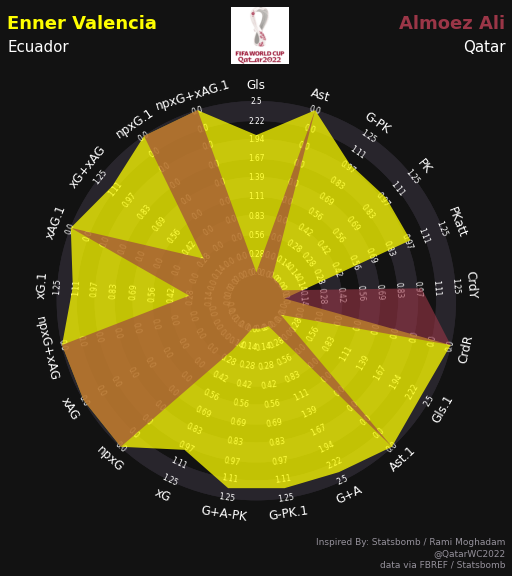

In [56]:
radar = Radar(
  label_fontsize=12,
  range_fontsize=7.5,
  background_color="#121212",
  patch_color="#28252C",
  label_color="#FFFFFF",
  range_color="#FFFFFF"
)

fig,ax = radar.plot_radar(
  ranges=ranges,
  params=params,
  values=values,
  radar_color=['#ffff00', '#9B3647'],
  alphas=[.75,.6],
  title=title,
  image='../../image/1-2022.png',
  image_coord=[0.495, 0.805, 0.04, 0.1],
  compare=True,
  filename="../output/EcuadorQatar.jpg",
  endnote=endnote,
)